# F / OH site preference in (F/OH)-substituted anatase TiO<sub>2</sub>.

Benjamin J. Morgan

This notebook compares the relative energies for different anion configurations in (F/OH)-substituted TiO<sub>2</sub>.

[Corradini *et al.*](https://dx.doi.org/10.1038/srep11553) and [Li *et al.*](https://dx.doi.org/10.1021/acs.chemmater.5b01407) have previously reported DFT calculations that predict F<sub>O</sub> defects in F-substituted anatase TiO<sub>2</sub> preferentially occupy equatorial sites neighbouring a charge compensating *V*<sub>Ti</sub> vacancy.

In this notebook, we replicate this result using new DFT data, and then show that OH<sub>O</sub> similarly prefer to sit adjacent to the *V*<sub>Ti</sub> vacancy. For the [*V*<sub>Ti</sub> + 4OH<sub>O</sub>] defect complex, we find that a mix of equatorial and axial OH groups is slightly favourable relative to exclusive equatorial OH groups.

In [1]:
import numpy as np
from vasppy.calculation import *
import matplotlib.pyplot as plt
import version_information

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# import figure_formatting
from figure_formatting import rcParams
from figure_formatting import master_formatting, nearly_black, tableau10

rcParams.update( master_formatting )

## Where do F<sub>O</sub> and OH<sub>O</sub> prefer to sit in relation to V<sub>Ti</sub>?

Start by reading in the energies, stoichiometries, and titles for all calculations summarised in `vaspdata.yaml`.

In [3]:
calcs = import_calculations_from_file( '../data/anion_location_test_data.yaml' )

# Check which calculation data we have read
for c in calcs:
    print( c )

Anatase TiO2 4x4x2 V_Ti + 0F_eq + 4F_sep
Anatase TiO2 4x4x2 V_Ti + 0OH_eq + 4OH_sep
Anatase TiO2 4x4x2 V_Ti + 1F_eq + 3F_sep
Anatase TiO2 4x4x2 V_Ti + 1OH_eq + 3OH_sep
Anatase TiO2 4x4x2 V_Ti + 2F_eq + 2F_ax
Anatase TiO2 4x4x2 V_Ti + 2F_eq + 2F_sep
Anatase TiO2 4x4x2 V_Ti + 2OH_eq + 2OH_ax
Anatase TiO2 4x4x2 V_Ti + 2OH_eq + 2OH_sep
Anatase TiO2 4x4x2 V_Ti + 3F_eq + 1F_ax
Anatase TiO2 4x4x2 V_Ti + 3F_eq + 1F_ax alternate
Anatase TiO2 4x4x2 V_Ti + 3F_eq + 1F_sep
Anatase TiO2 4x4x2 V_Ti + 3OH_eq + 1OH_sep
Anatase TiO2 4x4x2 V_Ti + 4F_eq + 0F_sep
Anatase TiO2 4x4x2 V_Ti + 4OH_eq + 0OH_sep


Each calculation is a 4×4×2 anatase TiO<sub>2</sub> supercell with 4 substituted anions, and a charge compensating Ti vacancy.  
There are three possible positions for each anion:
- adjacent to the Ti vacancy, in an equatorial position (denoted `_eq`),
- adjacent to the Ti vacancy, in an axial position (denoted `_ax`),
- separated from the Ti vacancy (denoted `_sep`).

## Comparing pure F<sub>O</sub> configurations

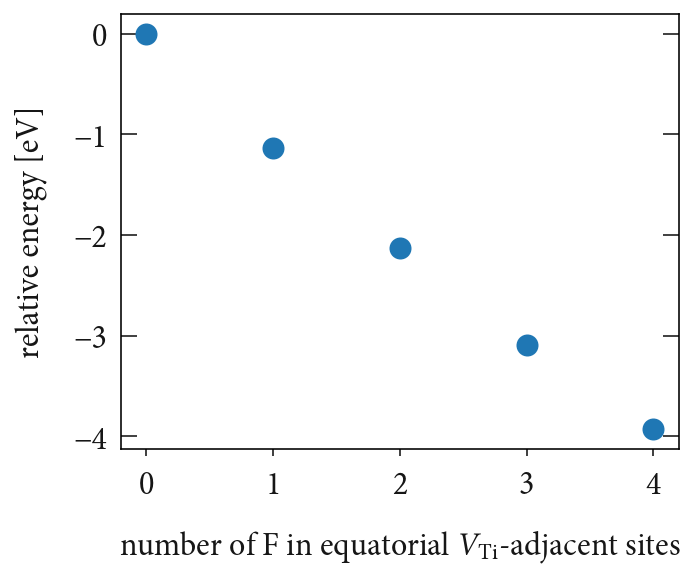

In [4]:
%%capture --no-stdout --no-display error

# Note: here we consider only equatorial vs. separated F_O.

plt.figure( figsize=(5,4))
energies = np.array([])
for i in range(5):
    title = 'Anatase TiO2 4x4x2 V_Ti + {}F_eq + {}F_sep'.format( i, 4-i )
    c = calcs[ title ]
    energies = np.hstack( [ energies, c.energy ] )
plt.plot( range(5), energies-energies[0], 'o' )
plt.xticks([0,1,2,3,4])
plt.xlabel(r'number of F in equatorial $V_\mathrm{Ti}$-adjacent sites')
plt.ylabel('relative energy [eV]')
plt.savefig( '../figures/F_O_configuration_energies.pdf' )

F prefers to sit in an equatorial position adjacent to the *V*<sub>Ti</sub> site, rather than be separated, by approximately 1 eV per F.

This replicates the trend reported in [Corradini et al., Sci. Rep. 5, 11553 (2015)](https://dx.doi.org/10.1038/srep11553), and in [Li et al. Chem. Mater. 27, 5014 (2015)](https://dx.doi.org/10.1021/acs.chemmater.5b01407).

## Is this trend also seen for OH<sub>O</sub>?

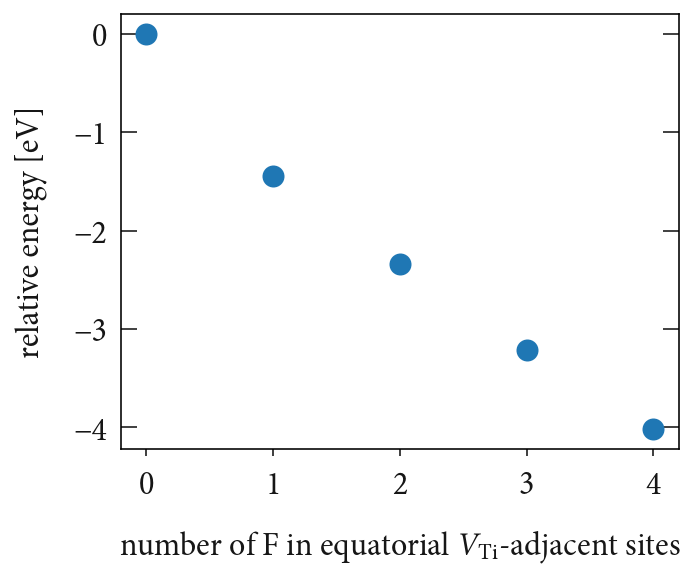

In [5]:
%%capture --no-stdout --no-display error

# Note: here we consider only equatorial vs. separated OH_O.

plt.figure( figsize=(5,4))
energies = np.array([])
for i in range(5):
    title = 'Anatase TiO2 4x4x2 V_Ti + {}OH_eq + {}OH_sep'.format( i, 4-i )
    c = calcs[ title ]
    energies = np.hstack( [ energies, c.energy ] )
plt.plot( range(5), energies-energies[0], 'o' )
plt.xticks([0,1,2,3,4])
plt.xlabel(r'number of F in equatorial $V_\mathrm{Ti}$-adjacent sites')
plt.ylabel('relative energy [eV]')
plt.savefig( '../figures/OH_O_configuration_energies.pdf' )

### Is there any preference for axial versus equatorial F/OH around the Ti vacancy?

In [6]:
# Any preference for axial vs equatorial F anions?
for c in [ '2F_eq + 2F_ax', '3F_eq + 1F_ax', '3F_eq + 1F_ax alternate', '4F_eq + 0F_sep' ]:
    title = 'Anatase TiO2 4x4x2 V_Ti + {}'.format( c )
    print( c, calcs[title].energy )  

2F_eq + 2F_ax -3166.24081848
3F_eq + 1F_ax -3166.16011614
3F_eq + 1F_ax alternate -3166.34073989
4F_eq + 0F_sep -3166.39054362


There is very little difference in energy for these different arrangements of fluoride ions. The configuration with all fluoride ions equatorial is most stable (by ~48 meV).

In [7]:
# Any preference for axial vs equatorial OH anions?
for c in [ '2OH_eq + 2OH_ax', '4OH_eq + 0OH_sep' ]:
    title = 'Anatase TiO2 4x4x2 V_Ti + {}'.format( c )
    print( c, calcs[title].energy )  

2OH_eq + 2OH_ax -3190.86890528
4OH_eq + 0OH_sep -3190.85441299


For the OH anions, having two OH axial and two OH equatorial is slightly more energetically favourable than having all four OH equatorial. A possible explanation for this difference versus the fluoride ions is that this mixed 2OH<sub>eq</sub> + 2OH<sub>ax</sub> arrangement allows four hydrogen bonds with O<sup>2-</sup> ions.

<img src='figures/V_Ti+2OH_eq+2OH_ax.png' style='width: 280px;' />


In [8]:
%load_ext version_information
%version_information numpy, vasppy, matplotlib, version_information

Software versions
Python 3.6.1 64bit [GCC 4.2.1 Compatible Apple LLVM 8.1.0 (clang-802.0.42)]
IPython 6.2.1
OS Darwin 17.4.0 x86_64 i386 64bit
numpy 1.13.3
vasppy 0.3.0
matplotlib 2.1.1
version_information 1.0.3
Tue Feb 20 20:50:14 2018 GMT